# Indian Stock Market Analysis
This Jupyter Notebook is used to perform Stock Market Analysis on **SENSEX**. 
## Introduction


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [11]:
data = pd.read_csv('sensex_data.csv')
data.head()  # To see the first few rows of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,21222.189453,21244.349609,21133.820312,21140.480469,21140.480469,4000
1,2014-01-02,21179.910156,21331.320312,20846.669922,20888.330078,20888.330078,9300
2,2014-01-03,20819.580078,20885.179688,20731.330078,20851.330078,20851.330078,9300
3,2014-01-06,20913.789062,20913.789062,20721.980469,20787.300781,20787.300781,7600
4,2014-01-07,20845.769531,20890.480469,20637.179688,20693.240234,20693.240234,8100


In [12]:
data.info()  # To get information about the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2454 non-null   object 
 1   Open       2454 non-null   float64
 2   High       2454 non-null   float64
 3   Low        2454 non-null   float64
 4   Close      2454 non-null   float64
 5   Adj Close  2454 non-null   float64
 6   Volume     2454 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 134.3+ KB


In [13]:
# Summery stats for Apple Stock
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,39713.545195,39899.981062,39455.339996,39677.455538,39677.455538,1.426370e+05
std,13554.809807,13609.144785,13495.240618,13560.939039,13560.939039,1.508377e+06
min,20050.990234,20255.519531,19963.119141,20193.349609,20193.349609,0.000000e+00
25%,28014.090332,28143.279297,27826.524902,27993.437988,27993.437988,8.400000e+03
50%,35836.220703,35996.595703,35554.914062,35776.974609,35776.974609,1.130000e+04
75%,52631.533203,52816.393555,52345.579102,52547.592773,52547.592773,1.610000e+04
max,72351.593750,72484.343750,72137.453125,72410.382812,72410.382812,3.181510e+07


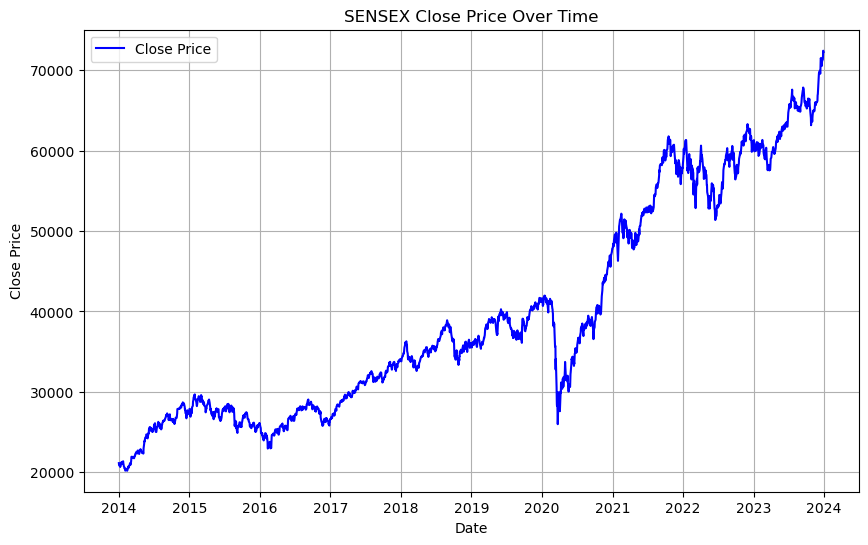

In [14]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Plotting SENSEX data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')
plt.title('SENSEX Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [15]:
# Calculate mean
mean_close = data['Close'].mean()

# Calculate median
median_close = data['Close'].median()

# Calculate standard deviation
std_close = data['Close'].std()

print("Mean Close Price:", mean_close)
print("Median Close Price:", median_close)
print("Standard Deviation of Close Price:", std_close)

Mean Close Price: 39677.455538152
Median Close Price: 35776.974609375
Standard Deviation of Close Price: 13560.939038842025


In [16]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change() * 100

# Display the first few rows
print(data[['Date', 'Returns']].head())

        Date   Returns
0 2014-01-01       NaN
1 2014-01-02 -1.192737
2 2014-01-03 -0.177132
3 2014-01-06 -0.307075
4 2014-01-07 -0.452490


In [17]:
# Calculate 50-day and 200-day moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Display the first few rows
print(data[['Date', 'SMA_50', 'SMA_200']].tail())

           Date        SMA_50       SMA_200
2449 2023-12-22  66836.738828  64143.971699
2450 2023-12-26  66934.013828  64203.600293
2451 2023-12-27  67046.614609  64269.245684
2452 2023-12-28  67169.167422  64332.252754
2453 2023-12-29  67290.633984  64392.331738


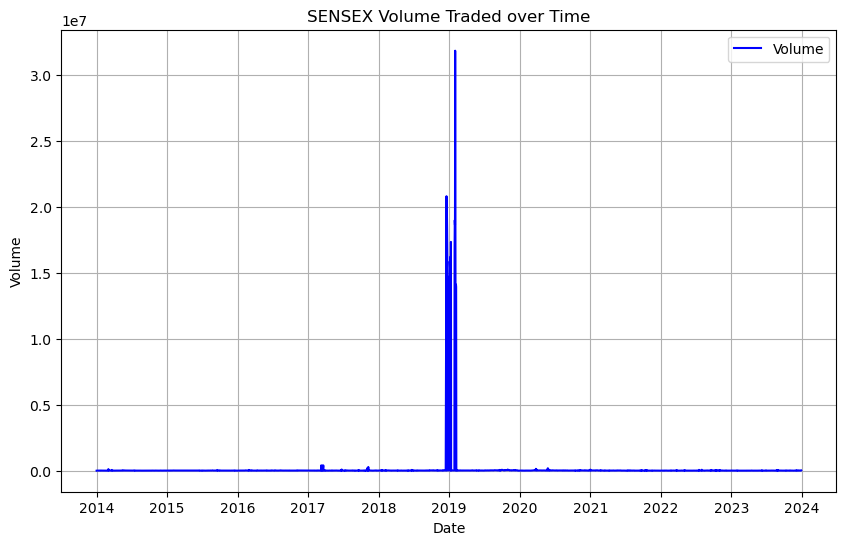

In [19]:
# Now let's plot the total volume of stock being traded each day over the past year
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'], color='blue', label='Volume')
plt.title('SENSEX Volume Traded over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

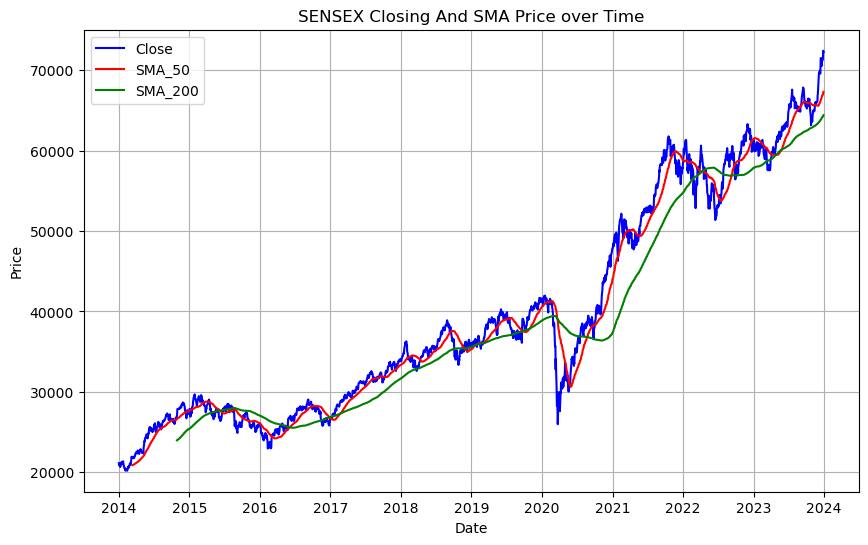

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', label="Close")
plt.plot(data['Date'], data['SMA_50'], color='red', label="SMA_50")
plt.plot(data['Date'], data['SMA_200'], color='green', label="SMA_200")
plt.title('SENSEX Closing And SMA Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Section 2 - Daily Return Analysis

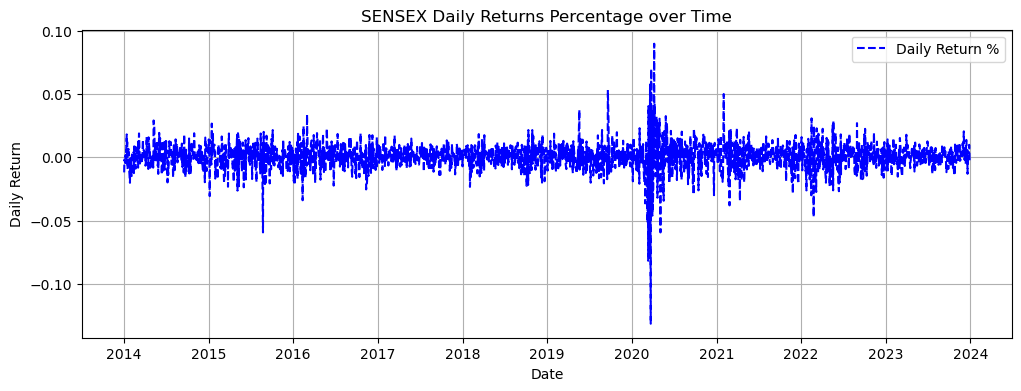

In [34]:
# We'll use pct_change to find the percent change for each day
data['Daily Return'] = data['Close'].pct_change()
# Lets plot the daily return percentage
plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['Daily Return'], color='blue', label='Daily Return %', linestyle='--')
plt.title('SENSEX Daily Returns Percentage over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
# Set date formatting for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [40]:
# Extract year from the Date column
data['Year'] = data['Date'].dt.year

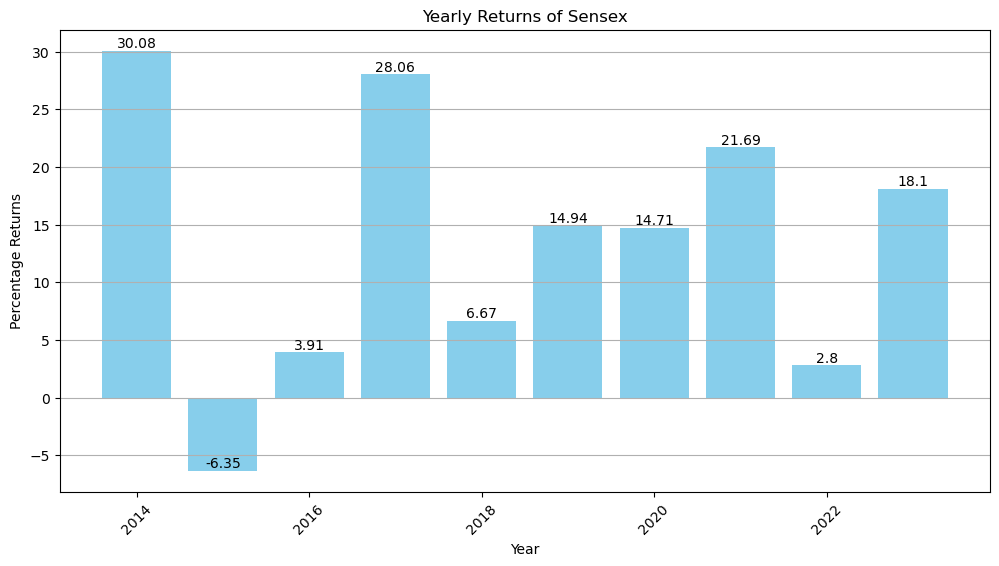

In [43]:
# Calculate yearly returns
yearly_returns = data.groupby('Year')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Plotting yearly returns
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_returns.index, yearly_returns, color='skyblue')

# Adding data value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
plt.title('Yearly Returns of Sensex')
plt.xlabel('Year')
plt.ylabel('Percentage Returns')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()